# [Analysis] Cooling
Goal: Model a real-world system (the cooling of a hot drink) with a differential equation. 

## Part 1: Experimentation
I filled a cup of water with hot water at 60°C (measured with a food thermometer). Ambient temperature stayed around 23.1°C for most of the experiment.

Every minute for the first hour, I recorded the temperature of the drink. After that, as the cooling slowed, I switched to 2-minute intervals, then 3, 5, 10, 20, and finally 30. The intervals weren't entirely accurate, as I often lost around 5-10 seconds getting a reading between intervals. But the overall results should be largely unaffected.

## Part 2: Visualization

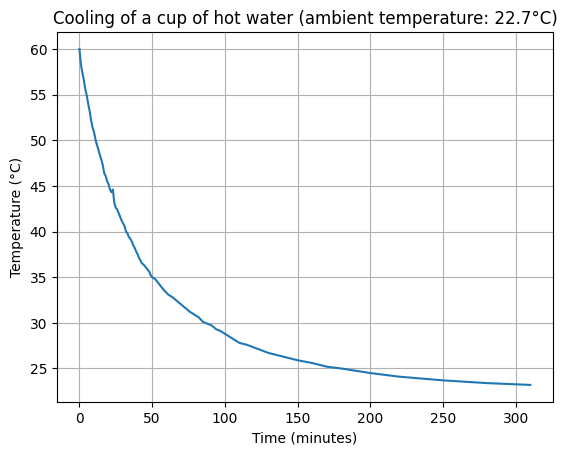

In [18]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('fixtures/cooling.csv') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    rows = list(csvreader)
    minutes = [r['minute'] for r in rows]
    temperatures = [r['temperature'] for r in rows]
    plt.plot(minutes, temperatures)

plt.grid(True)
plt.xlabel('t (minutes)')
plt.ylabel('T (°C)')
plt.title('Cooling of a cup of hot water (ambient temperature: 23.1°C)')
    
    


As expected, it's a decay curve; not only does the temperature decrease, but the rate of cooling slows down as the temperature gets closer to the ambient temperature. This means the derivative should also be a decay. Let's plot that:

Text(0.5, 1.0, 'dT/dt vs t')

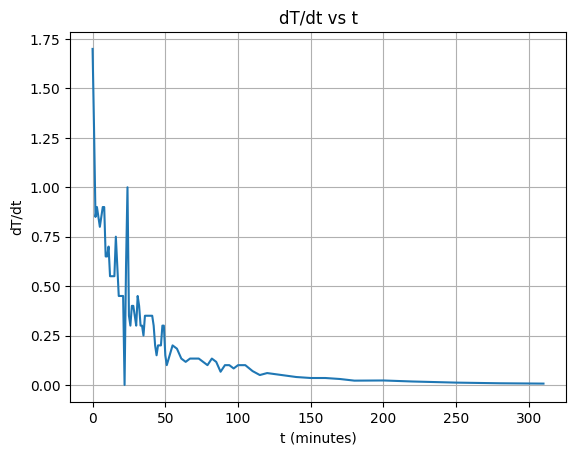

In [21]:
dT_dt = np.gradient(temperatures, minutes)
plt.plot(minutes, np.abs(dT_dt))
plt.grid(True)
plt.xlabel('t (minutes)')
plt.ylabel('dT/dt')
plt.title('dT/dt vs t')

## Part 3: Analysis
We have empirical data showing the decay. Now we move to an analytical description.

First, we move to the theoretical explanation: [Newton's law of cooling](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling). It states that the rate of heat loss is directly proportional to the difference in temperature between the hot object and the environment. So, with a proportionality constant k, we have

$$ \frac{dT}{dt} = -k(T - T_{ambient}) $$
$$ \Rightarrow \frac{dT}{T - T_a} = -k dt $$

Integrating both sides:
$$ \Rightarrow  \ln(T - T_a) = -kt + c $$
$$ \Rightarrow  T - T_a = C.e^{-kt} $$
$$ \Rightarrow  T = 23.1 + C.e^{-kt} $$

To find C, we can use our first reading, t=0 and T(0) = 60.
$$ 60 = 23.1 + C \Rightarrow C = 36.9 $$

To find k, we can use our final reading, t=310 and T(0) = 23.2
$$ 23.2 = 23.1 + 36.9e^{-k} \Rightarrow k = 0.019 $$

Thus, $ T = 23.1 + 36.9e^{-.019t} $.

(Aside: I'm not sure if this is the most thorough way to compute k, but it gave the most consistent curve.)

Let's compare the calculated results with the observed data.

Text(0.5, 1.0, 'Measured vs calculated cooling of a cup of hot water (T_a = 23.1°C)')

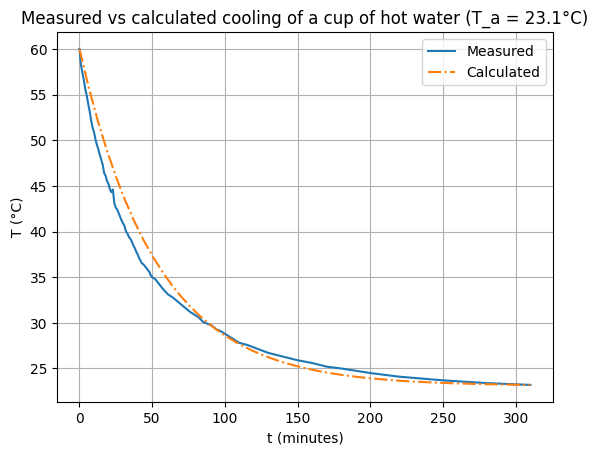

In [35]:
t = np.linspace(0, 310)
k = 0.019
T = 23.1 + 36.9*np.exp(-k*t)
plt.plot(minutes, temperatures, label='Measured')
plt.plot(t, T, '-.', label='Calculated')
plt.grid(True)
plt.xlabel('t (minutes)')
plt.ylabel('T (°C)')
plt.legend()
plt.title('Measured vs calculated cooling of a cup of hot water (T_a = 23.1°C)')



## Personal thoughts
I knew what to expect, but it's still super cool to see and do this in person! The experiment part was quite cool (but recording temperature every minute was hell), and then, having an expected differential model (Newton's law) which we could then solve allows us to predict the full behaviour of this process. Where could we go from here?
- Refine the model with additional variables. I know the cooling is affected not only by the ambient temperature, but other factors such as the material of the container, whether there was a lid, etc. Additionally, the ambient temperature itself might fluctuate, giving us a second variable.
- Use the model to predict. Something to try: If I keep conditions the same (ambient temperature, container material), and repeat this experiment, could I predict the cooling curve using this model? $ \frac{dT}{dt} = -019(T - T_{ambient}) $

There are apparently many more real-world (including biological) processes that can be modelled as differential equations or exponential functions (for instance, growth of a bacterial population). Intriguing.